In [44]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy
import math
import seaborn as sns
import json
import re

sns.set()
sns.set_palette(sns.color_palette("muted"))

In [49]:
def do_analysis(file, label):
    with open(file) as json_file:
        content = json.load(json_file)
    for bench in content:
        name = bench['params']['fileLoc']
        score = round(bench['primaryMetric']['score'],3)
        error = round(bench['primaryMetric']['scoreError'],3)
        print('| ' + label + ' | ' + name + ' | ' +  str(score) + ' | ' + str(error) + ' | ops/s |')
        x_min = bench['primaryMetric']['scorePercentiles']['0.0']
        x_max = bench['primaryMetric']['scorePercentiles']['100.0']

       #print(bench['primaryMetric'])
        #print(str(x_min) + ' ' + str(x_max))
        mean = bench['primaryMetric']['score']
        std = bench['primaryMetric']['scoreError']/2.0

        x = np.linspace(x_min, x_max, 100)

        y = scipy.stats.norm.pdf(x,mean,std)

        plt.plot(x,y)

        plt.grid()

        #plt.xlim(x_min,x_max+std)
      #  plt.ylim(0,50)

        #plt.title('How to plot a normal distribution in python with matplotlib',fontsize=10)

        plt.xlabel('x')
        plt.ylabel('Normal Distribution')

       # plt.savefig("normal_distribution.png")
        #plt.show()


| Original | performanceTests/fib.ml | 0.469 | 0.019 | ops/s |
| Truffle | performanceTests/fib.ml | 0.616 | 0.009 | ops/s |
| Original | performanceTests/harmonic.ml | 0.093 | 0.001 | ops/s |
| Truffle | performanceTests/harmonic.ml | 0.226 | 0.002 | ops/s |


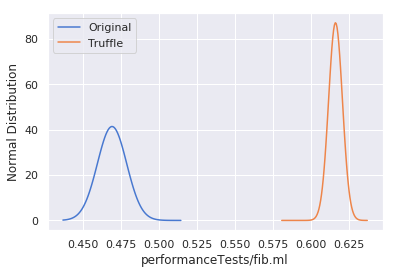

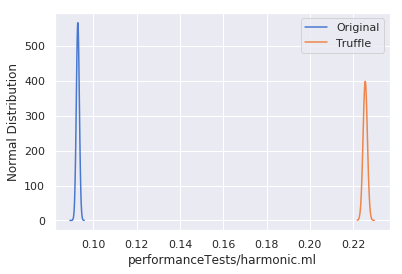

In [74]:
def do_full_analysis(inputs, programs):
    for inpt in inputs:
        with open(inpt['file']) as json_file:
            content = json.load(json_file)
        inpt['json']=content
    for program in programs:
        for inpt in inputs:
            bench = list(filter(lambda x: x['params']['fileLoc'] == program, inpt['json']))[0]
            name = bench['params']['fileLoc']
            score = round(bench['primaryMetric']['score'],3)
            error = round(bench['primaryMetric']['scoreError'],3)
            print('| ' + inpt['label'] + ' | ' + name + ' | ' +  str(score) + ' | ' + str(error) + ' | ops/s |')
    for program in programs:
        for inpt in inputs:
            bench = list(filter(lambda x: x['params']['fileLoc'] == program, inpt['json']))[0]
            x_min = bench['primaryMetric']['scorePercentiles']['0.0']
            x_max = bench['primaryMetric']['scorePercentiles']['100.0']

           #print(bench['primaryMetric'])
            #print(str(x_min) + ' ' + str(x_max))
            mean = bench['primaryMetric']['score']
            std = bench['primaryMetric']['scoreError']/2.0

            x = np.linspace(x_min, x_max, 100)

            y = scipy.stats.norm.pdf(x,mean,std)

            plt.plot(x,y, label=inpt['label'])

            plt.grid()

              #plt.title('How to plot a normal distribution in python with matplotlib',fontsize=10)

            plt.xlabel(program)
            plt.ylabel('Normal Distribution')
        plt.legend()
        img_path=program.replace('.', '_').split('/')[-1] +'_distribution.png'
        plt.savefig(img_path)
        plt.show()

original={
    'file': '/home/manuel/dev/java/Funcon4J/benchmarks/original.json',
    'label': 'Original',
}
truffle={
    'file': '/home/manuel/dev/java/Funcon4J/benchmarks/truffle.json',
    'label': 'Truffle',
}
do_full_analysis([original, truffle], ['performanceTests/fib.ml', 'performanceTests/harmonic.ml'])

| Truffle | performanceTests/fib.ml | 0.616 | 0.009 | ops/s |
| Truffle | performanceTests/harmonic.ml | 0.226 | 0.002 | ops/s |


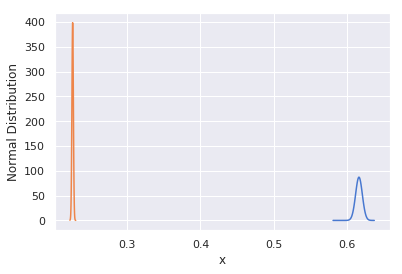

In [50]:
do_analysis('/home/manuel/dev/java/Funcon4J/benchmarks/truffle.json', 'Truffle')

| Original | performanceTests/fib.ml | 0.469 | 0.019 | ops/s |
| Original | performanceTests/harmonic.ml | 0.093 | 0.001 | ops/s |


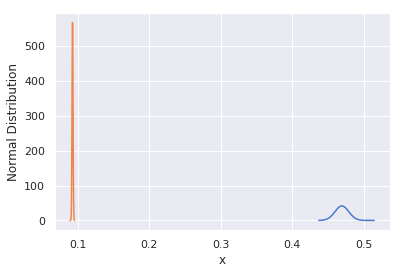

In [51]:
do_analysis('/home/manuel/dev/java/Funcon4J/benchmarks/original.json', 'Original')